In [1]:
!pip install bar_chart_race
!apt install ffmpeg
import bar_chart_race as bcr
import plotly.express as px
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 KB 4.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
athletes = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/forbesathletesv2.csv')

In [4]:
athletes.head()

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball


In [5]:
athletes.tail()

,Name,Earnings,Year,Sport
1654,Patrick Ewing,4.2,1990,Basketball
1655,Greg LeMond,4.2,1990,Cycling
1656,Gerhard Berger,4.0,1990,Racing
1657,Curtis Strange,3.8,1990,Golf
1658,Will Clark,3.8,1990,Baseball


In [6]:
earnings = athletes[['Name', 'Earnings']]
earnings = earnings.rename(columns={'Earnings': 'Earnings(Millions)'})
earnings

,Name,Earnings(Millions)
0,Conor McGregor,180.0
1,Lionel Messi,130.0
2,Cristiano Ronaldo,120.0
3,Dak Prescott,107.5
4,LeBron James,96.5
...,...,...
1654,Patrick Ewing,4.2
1655,Greg LeMond,4.2
1656,Gerhard Berger,4.0
1657,Curtis Strange,3.8


In [7]:
lebron = athletes[athletes['Name'] == 'LeBron James'].sort_values('Year')

In [8]:
lebron.head()

,Name,Earnings,Year,Sport
952,LeBron James,48.0,2011,Basketball
853,LeBron James,53.0,2012,Basketball
753,LeBron James,59.8,2013,Basketball
652,LeBron James,72.3,2014,Basketball
555,LeBron James,64.8,2015,Basketball


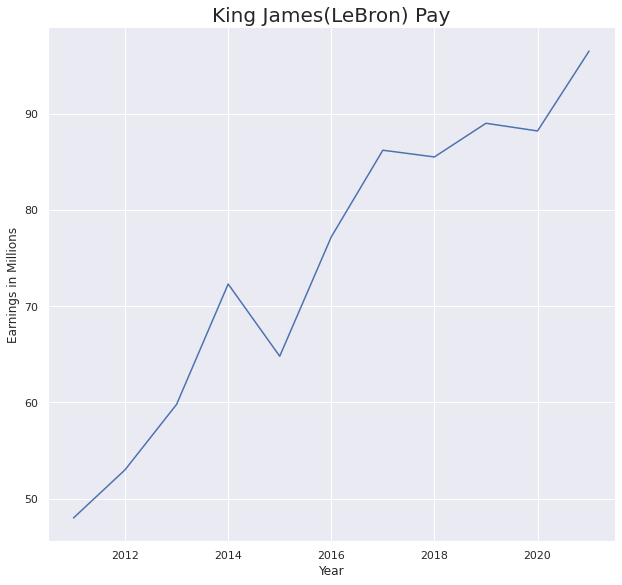

In [9]:
sns.set_theme()
sns.relplot(data=lebron, kind='line', x='Year', y='Earnings',  height = 8, aspect = 1.1)
plt.ylabel('Earnings in Millions')
plt.title("King James(LeBron) Pay", fontsize=20)
plt.show()


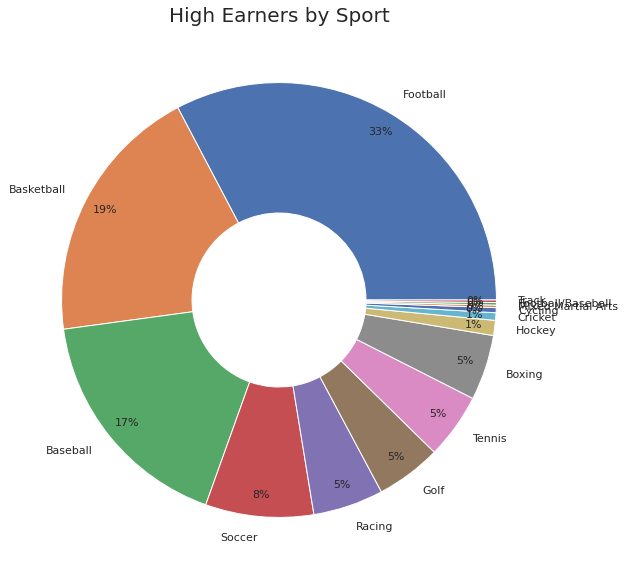

In [10]:
athletes.groupby("Name").first()["Sport"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(15,10),wedgeprops=dict(width=0.6),pctdistance=0.9, fontsize=11)
plt.ylabel(None)
plt.title("High Earners by Sport",fontweight="regular", fontsize = 20)
plt.show()

In [11]:
#Earnings over the Years
fig = px.scatter(data_frame = athletes, x="Year", y="Earnings", size="Earnings", color= "Earnings", trendline="ols", width=900, height=600)
fig

In [12]:
"""
This cell is the most important selection. For this particular cohort, we select the last 10 years of athletes,
but also the ones that showed up 10+ times ont he list.
Due to the nature of sports, many of the athletes on this list retired between 1990-2021
"""
athlete_selection = athletes[athletes['Name'].map(athletes['Name'].value_counts()) >= 10]
athlete_selection = athlete_selection[athlete_selection['Year'] >=2011]
athlete_selection

,Name,Earnings,Year,Sport
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
4,LeBron James,96.5,2021,Basketball
6,Roger Federer,90.0,2021,Tennis
7,Lewis Hamilton,82.0,2021,Racing
...,...,...,...,...
972,Carmelo Anthony,25.1,2011,Basketball
975,Jeff Gordon,24.9,2011,Racing
978,Maria Sharapova,24.2,2011,Tennis
981,Kevin Garnett,23.8,2011,Basketball


(array([57., 48., 32., 21., 11., 10.,  8.,  4.,  3.,  3.]),
 array([ 18.2 ,  29.38,  40.56,  51.74,  62.92,  74.1 ,  85.28,  96.46,
        107.64, 118.82, 130.  ]),
 <a list of 10 Patch objects>)

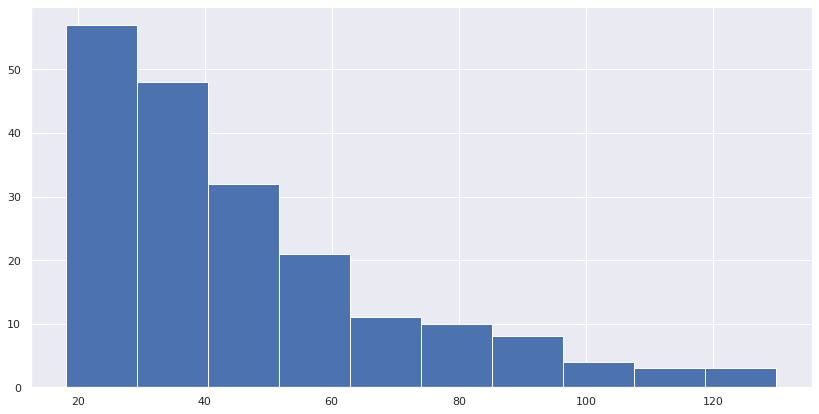

In [13]:
elite_earnings = athlete_selection['Earnings']
plt.figure(figsize = (14,7))
plt.hist(elite_earnings)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5380b2610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5380b2cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5380b22b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff537ffc3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff537ffc6d0>],
 'means': []}

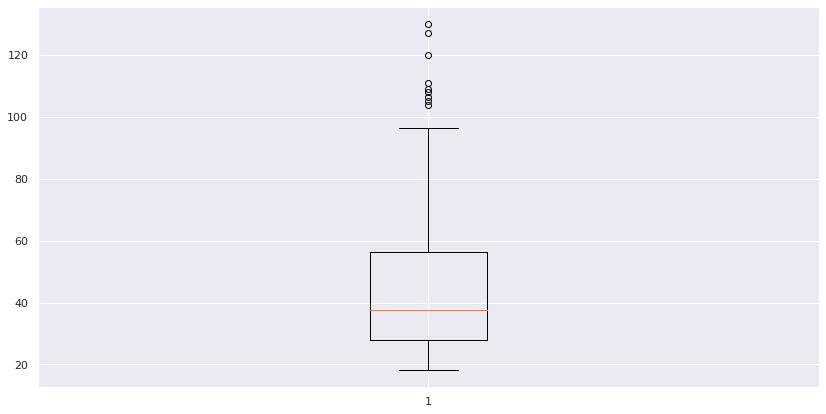

In [14]:
plt.figure(figsize = (14,7))
plt.boxplot(elite_earnings)

In [15]:
athlete_bar_data = athlete_selection.pivot_table(values= "Earnings",index="Year",columns="Name")
athlete_bar_data.cumsum()

Name,Alex Rodriguez,Carmelo Anthony,Chris Paul,Cristiano Ronaldo,Dale Earnhardt Jr,David Beckham,Derek Jeter,Dwight Howard,Fernando Alonso,Jeff Gordon,...,Lionel Messi,Maria Sharapova,Michael Schumacher,Novak Djokovic,Peyton Manning,Phil Mickelson,Rafael Nadal,Roger Federer,Serena Williams,Tiger Woods
Year,,,,,,,,,,,,,,,,,,,,,
2011,35.0,25.1,20.9,38.0,28.5,40.0,29.0,27.6,32.0,24.9,...,32.3,24.2,34.0,NaN,26.1,46.5,31.5,47.0,NaN,75.0
2012,68.0,48.0,40.1,80.5,56.7,86.0,53.5,53.2,64.0,48.5,...,71.3,52.1,64.0,20.6,68.5,94.3,64.7,99.7,NaN,134.4
2013,98.3,76.0,61.9,124.5,82.7,133.2,78.9,79.7,94.0,66.7,...,112.6,81.1,NaN,47.5,98.5,143.0,91.1,171.2,20.5,212.5
2014,121.2,105.4,86.1,204.5,108.6,NaN,103.2,105.2,125.0,85.4,...,177.3,105.5,NaN,80.6,125.6,196.2,135.6,227.4,42.5,273.7
2015,NaN,135.9,112.2,284.1,132.2,NaN,NaN,130.7,160.5,NaN,...,251.1,135.2,NaN,128.8,152.6,247.0,168.1,294.4,67.1,324.3
2016,142.3,166.8,142.2,372.1,155.7,NaN,NaN,157.6,197.0,NaN,...,332.5,157.1,NaN,184.6,186.8,299.9,205.6,362.2,96.0,369.6
2017,NaN,199.4,173.1,465.1,177.1,NaN,NaN,184.8,233.0,NaN,...,412.5,NaN,NaN,222.2,NaN,343.4,237.1,426.2,123.0,406.7
2018,NaN,232.6,205.0,573.1,NaN,NaN,NaN,211.8,266.0,NaN,...,523.5,NaN,NaN,245.7,NaN,384.7,278.5,503.4,NaN,450.0
2019,NaN,266.6,248.8,682.1,NaN,NaN,NaN,239.6,NaN,NaN,...,650.5,NaN,NaN,296.3,NaN,433.1,313.5,596.8,152.2,513.9


In [16]:
athlete_bar_data.columns[athlete_bar_data.isnull().sum() == 0]

Index(['Chris Paul', 'Cristiano Ronaldo', 'LeBron James', 'Lewis Hamilton',
       'Lionel Messi', 'Phil Mickelson', 'Roger Federer', 'Tiger Woods'],
      dtype='object', name='Name')

In [17]:
"""
This cell will backfill any missing values. The issue is that it backfills any athletes that were on the list,
therefore creating problems if the athlete retired in between. A more elegant solution may be required for this.
"""
athlete_backfilled = athlete_bar_data.interpolate(method="linear").fillna(method="bfill")
athlete_backfilled

Name,Alex Rodriguez,Carmelo Anthony,Chris Paul,Cristiano Ronaldo,Dale Earnhardt Jr,David Beckham,Derek Jeter,Dwight Howard,Fernando Alonso,Jeff Gordon,...,Lionel Messi,Maria Sharapova,Michael Schumacher,Novak Djokovic,Peyton Manning,Phil Mickelson,Rafael Nadal,Roger Federer,Serena Williams,Tiger Woods
Year,,,,,,,,,,,,,,,,,,,,,
2011,35.0,25.1,20.9,38.0,28.5,40.0,29.0,27.6,32.0,24.9,...,32.3,24.2,34.0,20.6,26.1,46.5,31.5,47.0,20.5,75.0
2012,33.0,22.9,19.2,42.5,28.2,46.0,24.5,25.6,32.0,23.6,...,39.0,27.9,30.0,20.6,42.4,47.8,33.2,52.7,20.5,59.4
2013,30.3,28.0,21.8,44.0,26.0,47.2,25.4,26.5,30.0,18.2,...,41.3,29.0,30.0,26.9,30.0,48.7,26.4,71.5,20.5,78.1
2014,22.9,29.4,24.2,80.0,25.9,47.2,24.3,25.5,31.0,18.7,...,64.7,24.4,30.0,33.1,27.1,53.2,44.5,56.2,22.0,61.2
2015,22.0,30.5,26.1,79.6,23.6,47.2,24.3,25.5,35.5,18.7,...,73.8,29.7,30.0,48.2,27.0,50.8,32.5,67.0,24.6,50.6
2016,21.1,30.9,30.0,88.0,23.5,47.2,24.3,26.9,36.5,18.7,...,81.4,21.9,30.0,55.8,34.2,52.9,37.5,67.8,28.9,45.3
2017,21.1,32.6,30.9,93.0,21.4,47.2,24.3,27.2,36.0,18.7,...,80.0,21.9,30.0,37.6,34.2,43.5,31.5,64.0,27.0,37.1
2018,21.1,33.2,31.9,108.0,21.4,47.2,24.3,27.0,33.0,18.7,...,111.0,21.9,30.0,23.5,34.2,41.3,41.4,77.2,28.1,43.3
2019,21.1,34.0,43.8,109.0,21.4,47.2,24.3,27.8,33.0,18.7,...,127.0,21.9,30.0,50.6,34.2,48.4,35.0,93.4,29.2,63.9


In [18]:
athlete_backfilled = athlete_backfilled.cumsum()
athlete_backfilled

Name,Alex Rodriguez,Carmelo Anthony,Chris Paul,Cristiano Ronaldo,Dale Earnhardt Jr,David Beckham,Derek Jeter,Dwight Howard,Fernando Alonso,Jeff Gordon,...,Lionel Messi,Maria Sharapova,Michael Schumacher,Novak Djokovic,Peyton Manning,Phil Mickelson,Rafael Nadal,Roger Federer,Serena Williams,Tiger Woods
Year,,,,,,,,,,,,,,,,,,,,,
2011,35.0,25.1,20.9,38.0,28.5,40.0,29.0,27.6,32.0,24.9,...,32.3,24.2,34.0,20.6,26.1,46.5,31.5,47.0,20.5,75.0
2012,68.0,48.0,40.1,80.5,56.7,86.0,53.5,53.2,64.0,48.5,...,71.3,52.1,64.0,41.2,68.5,94.3,64.7,99.7,41.0,134.4
2013,98.3,76.0,61.9,124.5,82.7,133.2,78.9,79.7,94.0,66.7,...,112.6,81.1,94.0,68.1,98.5,143.0,91.1,171.2,61.5,212.5
2014,121.2,105.4,86.1,204.5,108.6,180.4,103.2,105.2,125.0,85.4,...,177.3,105.5,124.0,101.2,125.6,196.2,135.6,227.4,83.5,273.7
2015,143.2,135.9,112.2,284.1,132.2,227.6,127.5,130.7,160.5,104.1,...,251.1,135.2,154.0,149.4,152.6,247.0,168.1,294.4,108.1,324.3
2016,164.3,166.8,142.2,372.1,155.7,274.8,151.8,157.6,197.0,122.8,...,332.5,157.1,184.0,205.2,186.8,299.9,205.6,362.2,137.0,369.6
2017,185.4,199.4,173.1,465.1,177.1,322.0,176.1,184.8,233.0,141.5,...,412.5,179.0,214.0,242.8,221.0,343.4,237.1,426.2,164.0,406.7
2018,206.5,232.6,205.0,573.1,198.5,369.2,200.4,211.8,266.0,160.2,...,523.5,200.9,244.0,266.3,255.2,384.7,278.5,503.4,192.1,450.0
2019,227.6,266.6,248.8,682.1,219.9,416.4,224.7,239.6,299.0,178.9,...,650.5,222.8,274.0,316.9,289.4,433.1,313.5,596.8,221.3,513.9


In [19]:
final_data = athlete_backfilled.iloc[-1,:].sort_values(ascending=False)[:20].index
final_data = athlete_backfilled[final_data].round()
final_data

Name,Cristiano Ronaldo,Lionel Messi,LeBron James,Roger Federer,Tiger Woods,Kobe Bryant,Kevin Durant,Phil Mickelson,David Beckham,Lewis Hamilton,Novak Djokovic,Rafael Nadal,Fernando Alonso,Peyton Manning,Carmelo Anthony,Michael Schumacher,Chris Paul,Serena Williams,Dwight Howard,Derek Jeter
Year,,,,,,,,,,,,,,,,,,,,
2011,38.0,32.0,48.0,47.0,75.0,53.0,26.0,46.0,40.0,30.0,21.0,32.0,32.0,26.0,25.0,34.0,21.0,20.0,28.0,29.0
2012,80.0,71.0,101.0,100.0,134.0,105.0,51.0,94.0,86.0,58.0,41.0,65.0,64.0,68.0,48.0,64.0,40.0,41.0,53.0,54.0
2013,124.0,113.0,161.0,171.0,212.0,167.0,82.0,143.0,133.0,86.0,68.0,91.0,94.0,98.0,76.0,94.0,62.0,62.0,80.0,79.0
2014,204.0,177.0,233.0,227.0,274.0,229.0,114.0,196.0,180.0,118.0,101.0,136.0,125.0,126.0,105.0,124.0,86.0,84.0,105.0,103.0
2015,284.0,251.0,298.0,294.0,324.0,278.0,168.0,247.0,228.0,156.0,149.0,168.0,160.0,153.0,136.0,154.0,112.0,108.0,131.0,128.0
2016,372.0,332.0,375.0,362.0,370.0,328.0,224.0,300.0,275.0,202.0,205.0,206.0,197.0,187.0,167.0,184.0,142.0,137.0,158.0,152.0
2017,465.0,412.0,461.0,426.0,407.0,378.0,285.0,343.0,322.0,248.0,243.0,237.0,233.0,221.0,199.0,214.0,173.0,164.0,185.0,176.0
2018,573.0,524.0,547.0,503.0,450.0,428.0,342.0,385.0,369.0,300.0,266.0,278.0,266.0,255.0,233.0,244.0,205.0,192.0,212.0,200.0
2019,682.0,650.0,636.0,597.0,514.0,478.0,408.0,433.0,416.0,354.0,317.0,314.0,299.0,289.0,267.0,274.0,249.0,221.0,240.0,225.0


In [20]:
bcr.bar_chart_race(df=final_data,filename=None,title= "Highest Earning Athletes(Millions) 2011-2021")